Name: Chanyu Choung

Class: CMP414

Homework due date: Mar 1st, 2021 (Monday)

# Week 4 Homework
Evaluate k-nearest-neighbor method with different k values on the dataset used in Week 03 notebook (Source: https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt)

1. Load the data as a Pandas data frame.

2. Split the data into 80% training data and 20% test data.

3. Build three k-nearest-neighbor model with k = 1, 5, 25, respectively.

4. Train the models on the training set, and obtain the model predictions on the test set.

5. Calculate the test accuracy score for each model. Which k value give the best accuracy score?


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data frame
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
raw_data = pd.read_csv(url, sep=',')

# Display the data frame
print(raw_data.head(),'\n')
print("Size:",raw_data.shape,'\n')
print(raw_data.dtypes)

         x1        x2  y
0  2.526093  0.321050  0
1  0.366954  0.031462  0
2  0.768219  0.717486  0
3  0.693436  0.777194  0
4 -0.019837  0.867254  0 

Size: (200, 3) 

x1    float64
x2    float64
y       int64
dtype: object


In [ ]:
# Split the data into 80% training data and 20% test data.
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(raw_data, test_size=0.2)

In [ ]:
# Initiating the variables
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]
input_cols = ['x1', 'x2']

# Generating 100x100 grid of 10,000 points
plot_data = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data = plot_data.append({'x1': x1,
                              'x2': x2},
                              ignore_index=True)

In [ ]:
# Build three k-nearest-neighbor model with k = 1, 5, 25, respectively.
from sklearn.neighbors import KNeighborsClassifier

def use_knn(raw_data, num):
    # kNN model
    model_3nn = KNeighborsClassifier(n_neighbors=num)
    model_3nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

    # Use kNN model to predict on 10,000 points
    plot_data['prediction'] = model_3nn.predict(plot_data[input_cols])

    # Plotting the data
    test_data_blue = plot_data[plot_data['prediction'] == 0]
    test_data_red = plot_data[plot_data['prediction'] == 1]
    plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
    plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
    plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
    plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

    plt.title('Visualization of Data Set')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')
        
    return model_3nn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform') 



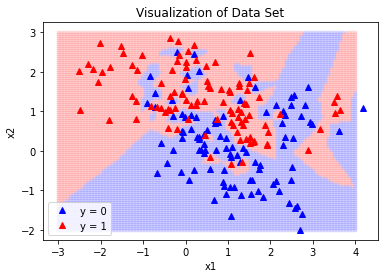

In [ ]:
# kNN model with 1 neighbor using plot data
kNN1 = use_knn(raw_data, 1)
print(kNN1,'\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



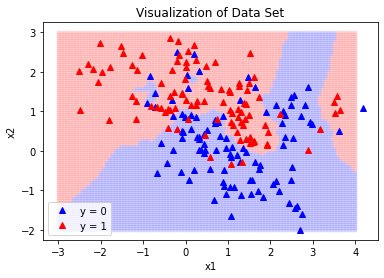

In [ ]:
# kNN model with 5 neighbor using plot data
kNN2 = use_knn(raw_data, 5)
print(kNN2,'\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform') 



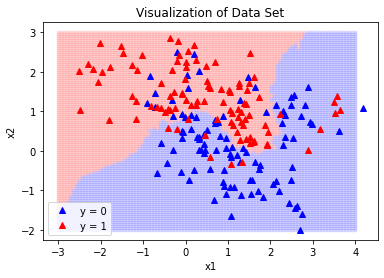

In [ ]:
# kNN model with 25 neighbor using plot data
kNN3 = use_knn(raw_data, 25)
print(kNN3,'\n')

In [ ]:
# Train the models on the training set, and obtain the model predictions on the test set.
from sklearn.metrics import accuracy_score

def use_knn_2(training_data, num):
    # kNN Model
    model_3nn_2 = KNeighborsClassifier(n_neighbors=num)
    model_3nn_2.fit(training_data[input_cols], training_data['y'])

    # Use kNN model to predict on 10,000 points
    test_data['prediction'] = model_3nn_2.predict(test_data[input_cols])

    # Accuracy score on test model
    print("Accuracy:",accuracy_score(test_data['y'], test_data['prediction']))

    return model_3nn_2

In [ ]:
# kNN model with 1 neighbor using test data
kNN1_test = use_knn_2(training_data, 1)
print(kNN1_test,'\n')

# kNN model with 5 neighbor using test data
kNN2_test = use_knn_2(training_data, 5)
print(kNN2_test,'\n')

# kNN model with 25 neighbor using test data
kNN3_test = use_knn_2(training_data, 25)
print(kNN3_test,'\n')

Accuracy: 0.75
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform') 

Accuracy: 0.825
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

Accuracy: 0.825
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform') 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Both 5 and 25 neighbors using Nearest Neighbor model works the best with the accuracy of 82.5%